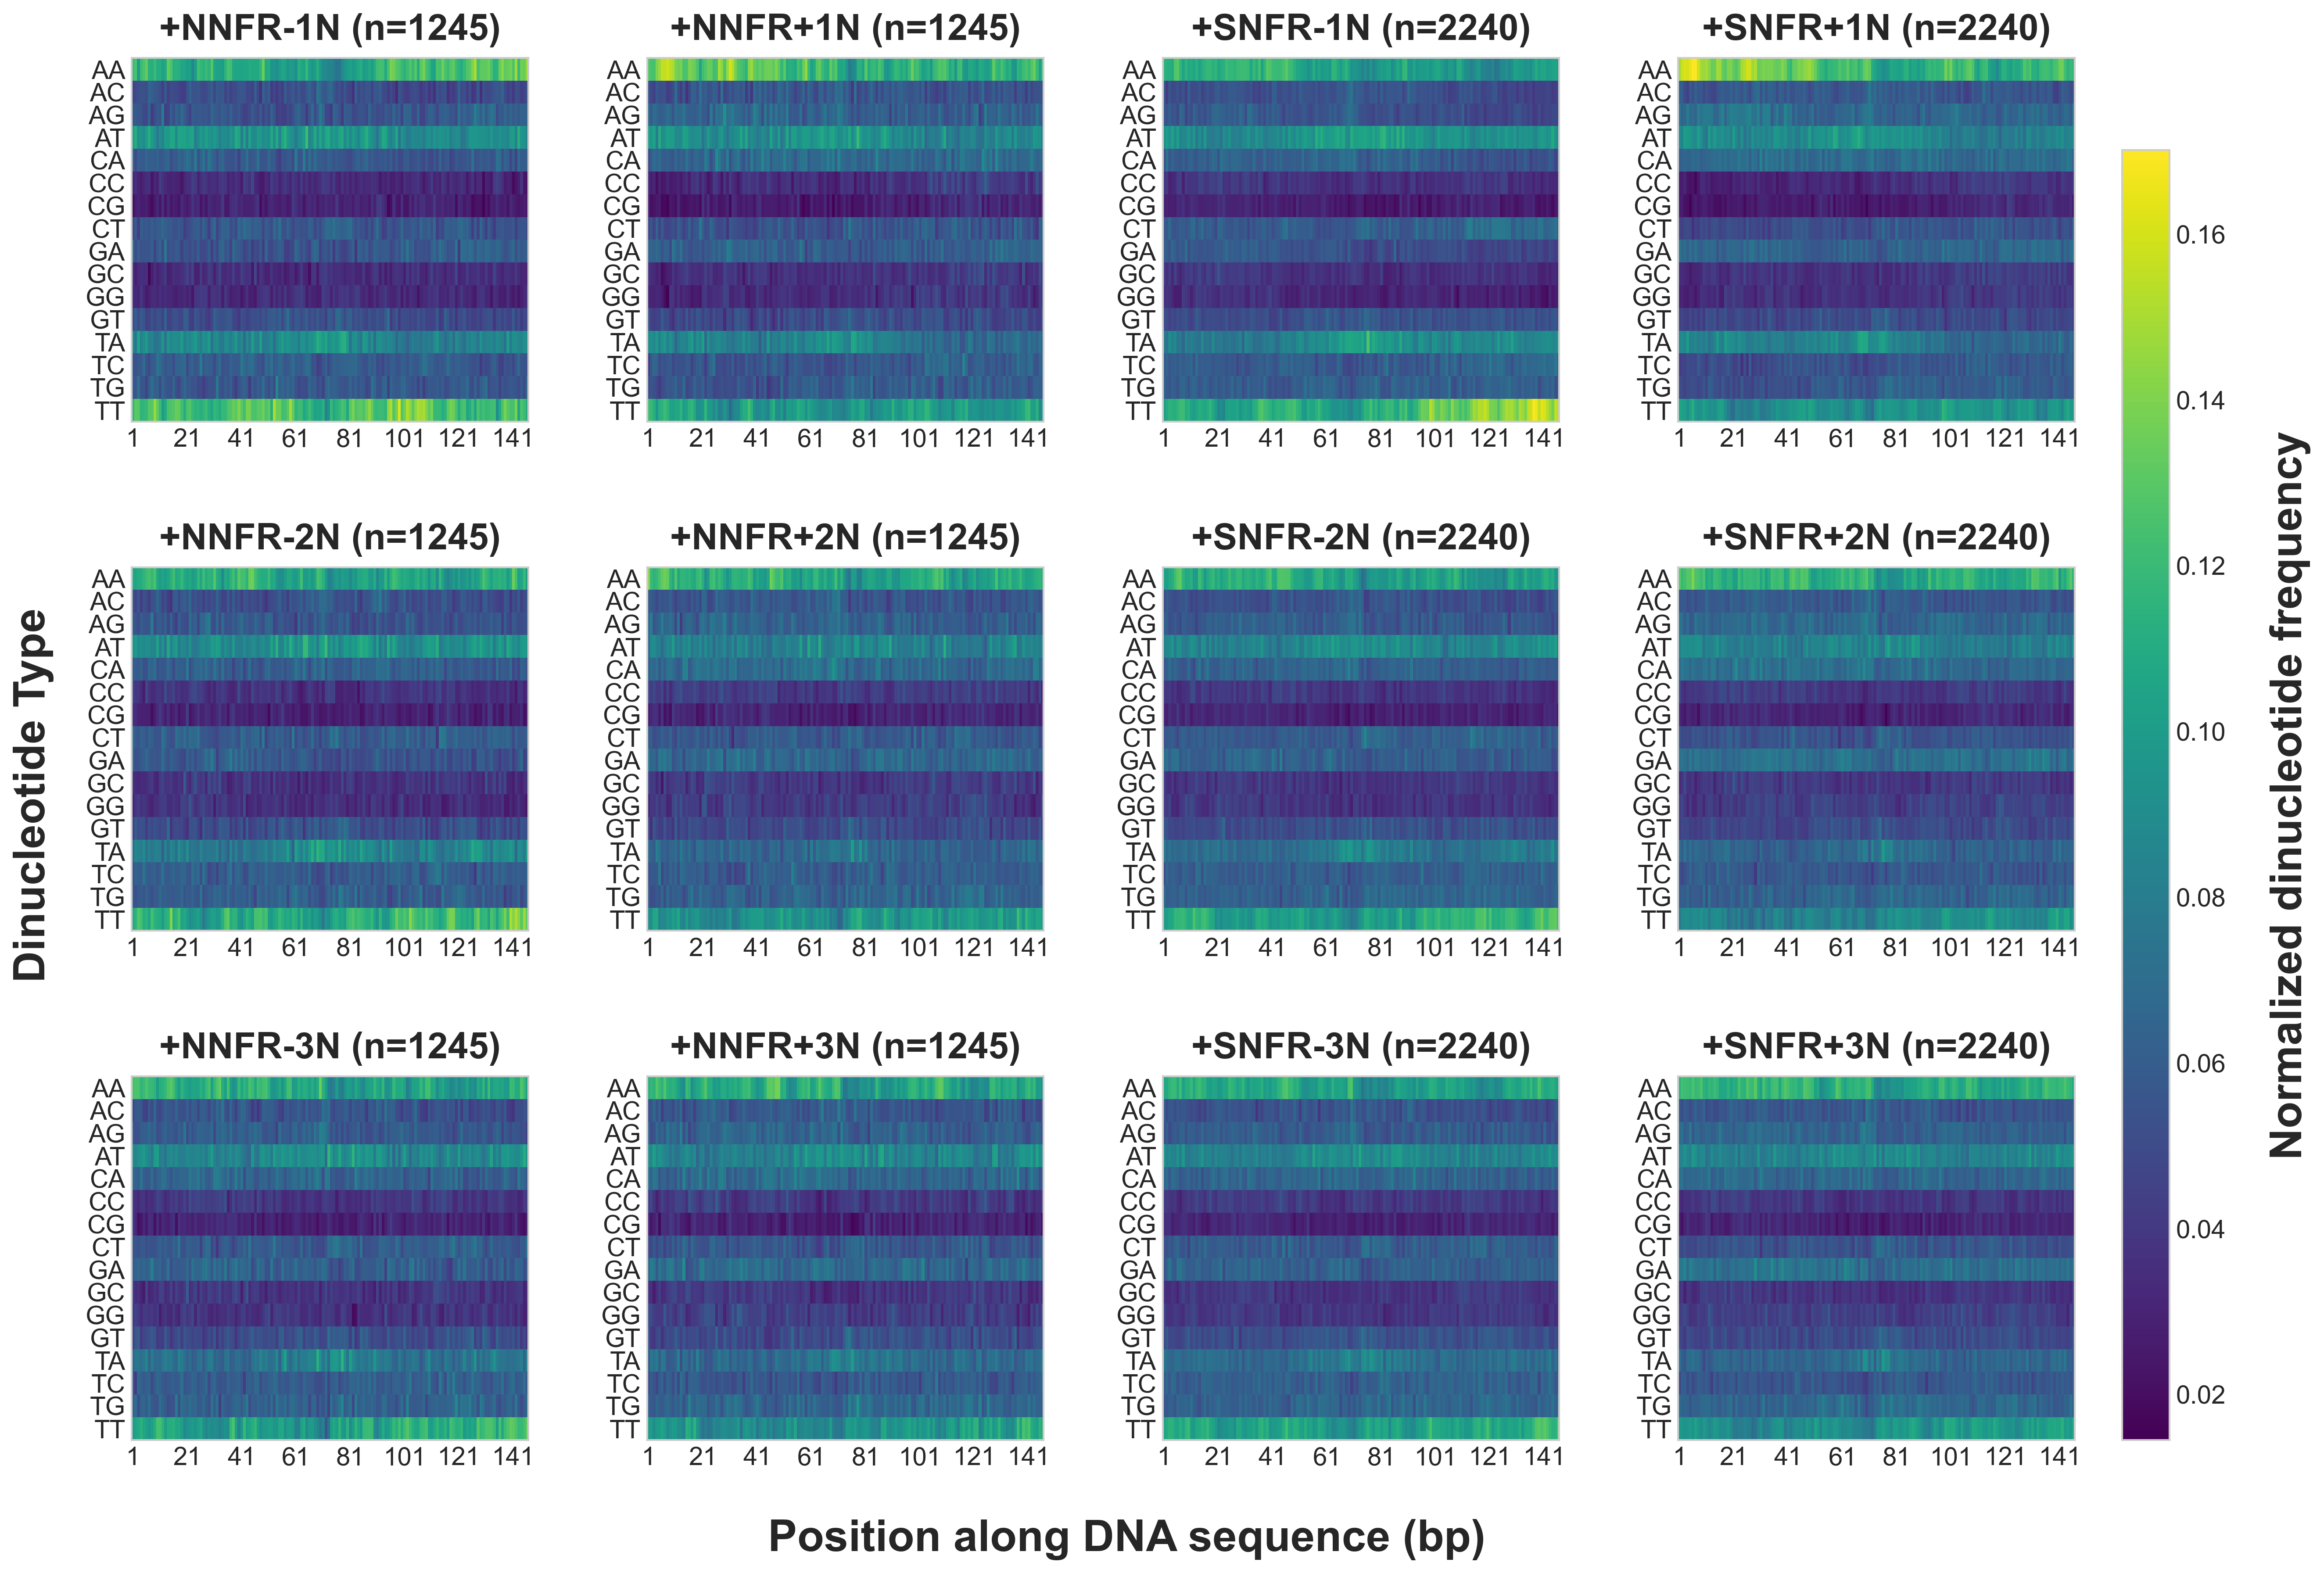

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import seaborn as sns

# 设置期刊论文绘图参数，增加字体大小
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': 'Arial',
    'font.size': 20,  # 增加基础字体大小
    'axes.titlesize': 20,  # 增加标题字体大小
    'axes.labelsize': 20,  # 增加坐标轴标签字体大小
    'xtick.labelsize': 14,  # 增加 x 轴刻度标签字体大小
    'ytick.labelsize': 14,  # 增加 y 轴刻度标签字体大小
    'legend.fontsize': 20,  # 增加图例字体大小
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.format': 'pdf',
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.1})

# 数据加载与处理
def load_h5_data(file_path):
    with h5py.File(file_path, 'r') as f:
        matrices = f['Nuar'][:]
    return matrices

# 更新文件路径列表，包含所有12个文件
file_paths = [
    "TSS-TTS矩阵/数字矩阵_+NNFR-1N-ALL.h5",
    "TSS-TTS矩阵/数字矩阵_+NNFR+1N-ALL.h5",
    "TSS-TTS矩阵/数字矩阵_+SNFR-1N-ALL.h5",
    "TSS-TTS矩阵/数字矩阵_+SNFR+1N-ALL.h5",
    "TSS-TTS矩阵/数字矩阵_+NNFR-2N-ALL.h5",
    "TSS-TTS矩阵/数字矩阵_+NNFR+2N-ALL.h5",
    "TSS-TTS矩阵/数字矩阵_+SNFR-2N-ALL.h5",
    "TSS-TTS矩阵/数字矩阵_+SNFR+2N-ALL.h5",
    "TSS-TTS矩阵/数字矩阵_+NNFR-3N-ALL.h5",
    "TSS-TTS矩阵/数字矩阵_+NNFR+3N-ALL.h5",
    "TSS-TTS矩阵/数字矩阵_+SNFR-3N-ALL.h5",
    "TSS-TTS矩阵/数字矩阵_+SNFR+3N-ALL.h5"
]

# 加载所有文件的数据
matrices_list = [load_h5_data(file_path) for file_path in file_paths]

# 计算每个文件的平均矩阵
average_matrices = [np.mean(matrices, axis=0) for matrices in matrices_list]

# 可视化与保存
dinucleotides = ['AA', 'AC', 'AG', 'AT', 'CA', 'CC', 'CG', 'CT',
                 'GA', 'GC', 'GG', 'GT', 'TA', 'TC', 'TG', 'TT']
positions = np.arange(1, 147)

# 创建3x4子图布局
fig, axs = plt.subplots(3, 4, figsize=(18, 14), gridspec_kw={'wspace': 0.3, 'hspace': 0.4})
vmin = min([mat.min() for mat in average_matrices])
vmax = max([mat.max() for mat in average_matrices])

# 更新标题列表，包括所有12个文件的标题
titles = [
    '+NNFR-1N', '+NNFR+1N', '+SNFR-1N', '+SNFR+1N',
    '+NNFR-2N', '+NNFR+2N', '+SNFR-2N', '+SNFR+2N',
    '+NNFR-3N', '+NNFR+3N', '+SNFR-3N', '+SNFR+3N'
]

# 绘制热图
for i, ax in enumerate(axs.flat):
    im = ax.imshow(average_matrices[i], cmap='viridis', aspect='auto', vmin=vmin, vmax=vmax)
    
    # 设置横轴刻度为每20个位置出现一个
    ax.set_xticks(np.arange(0, 146, 20))
    ax.set_xticklabels(positions[::20])  # 从positions中每隔20个取一个值作为刻度标签
    
    ax.set_yticks(range(16))
    ax.set_yticklabels(dinucleotides)
    ax.set_title(f"{titles[i]} (n={matrices_list[i].shape[0]})", fontweight='bold', pad=10)
    ax.grid(False)

# 添加共享颜色条
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Normalized dinucleotide frequency', fontsize=24, fontweight='bold', labelpad=24)

# 设置共享坐标轴标签，横坐标位置调整为中间位置
fig.text(0.5, 0.09, "Position along DNA sequence (bp)", fontweight='bold', ha='center', fontsize=24)
fig.text(0.03, 0.5, "Dinucleotide Type", fontweight='bold', va='center', rotation='vertical', fontsize=24)

# 调整子图位置，避免与颜色条重叠
plt.subplots_adjust(left=0.08, right=0.9, bottom=0.15, top=0.9)

# 保存图像
plt.savefig("可视化图/Positive chain_heatmap.pdf", format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()

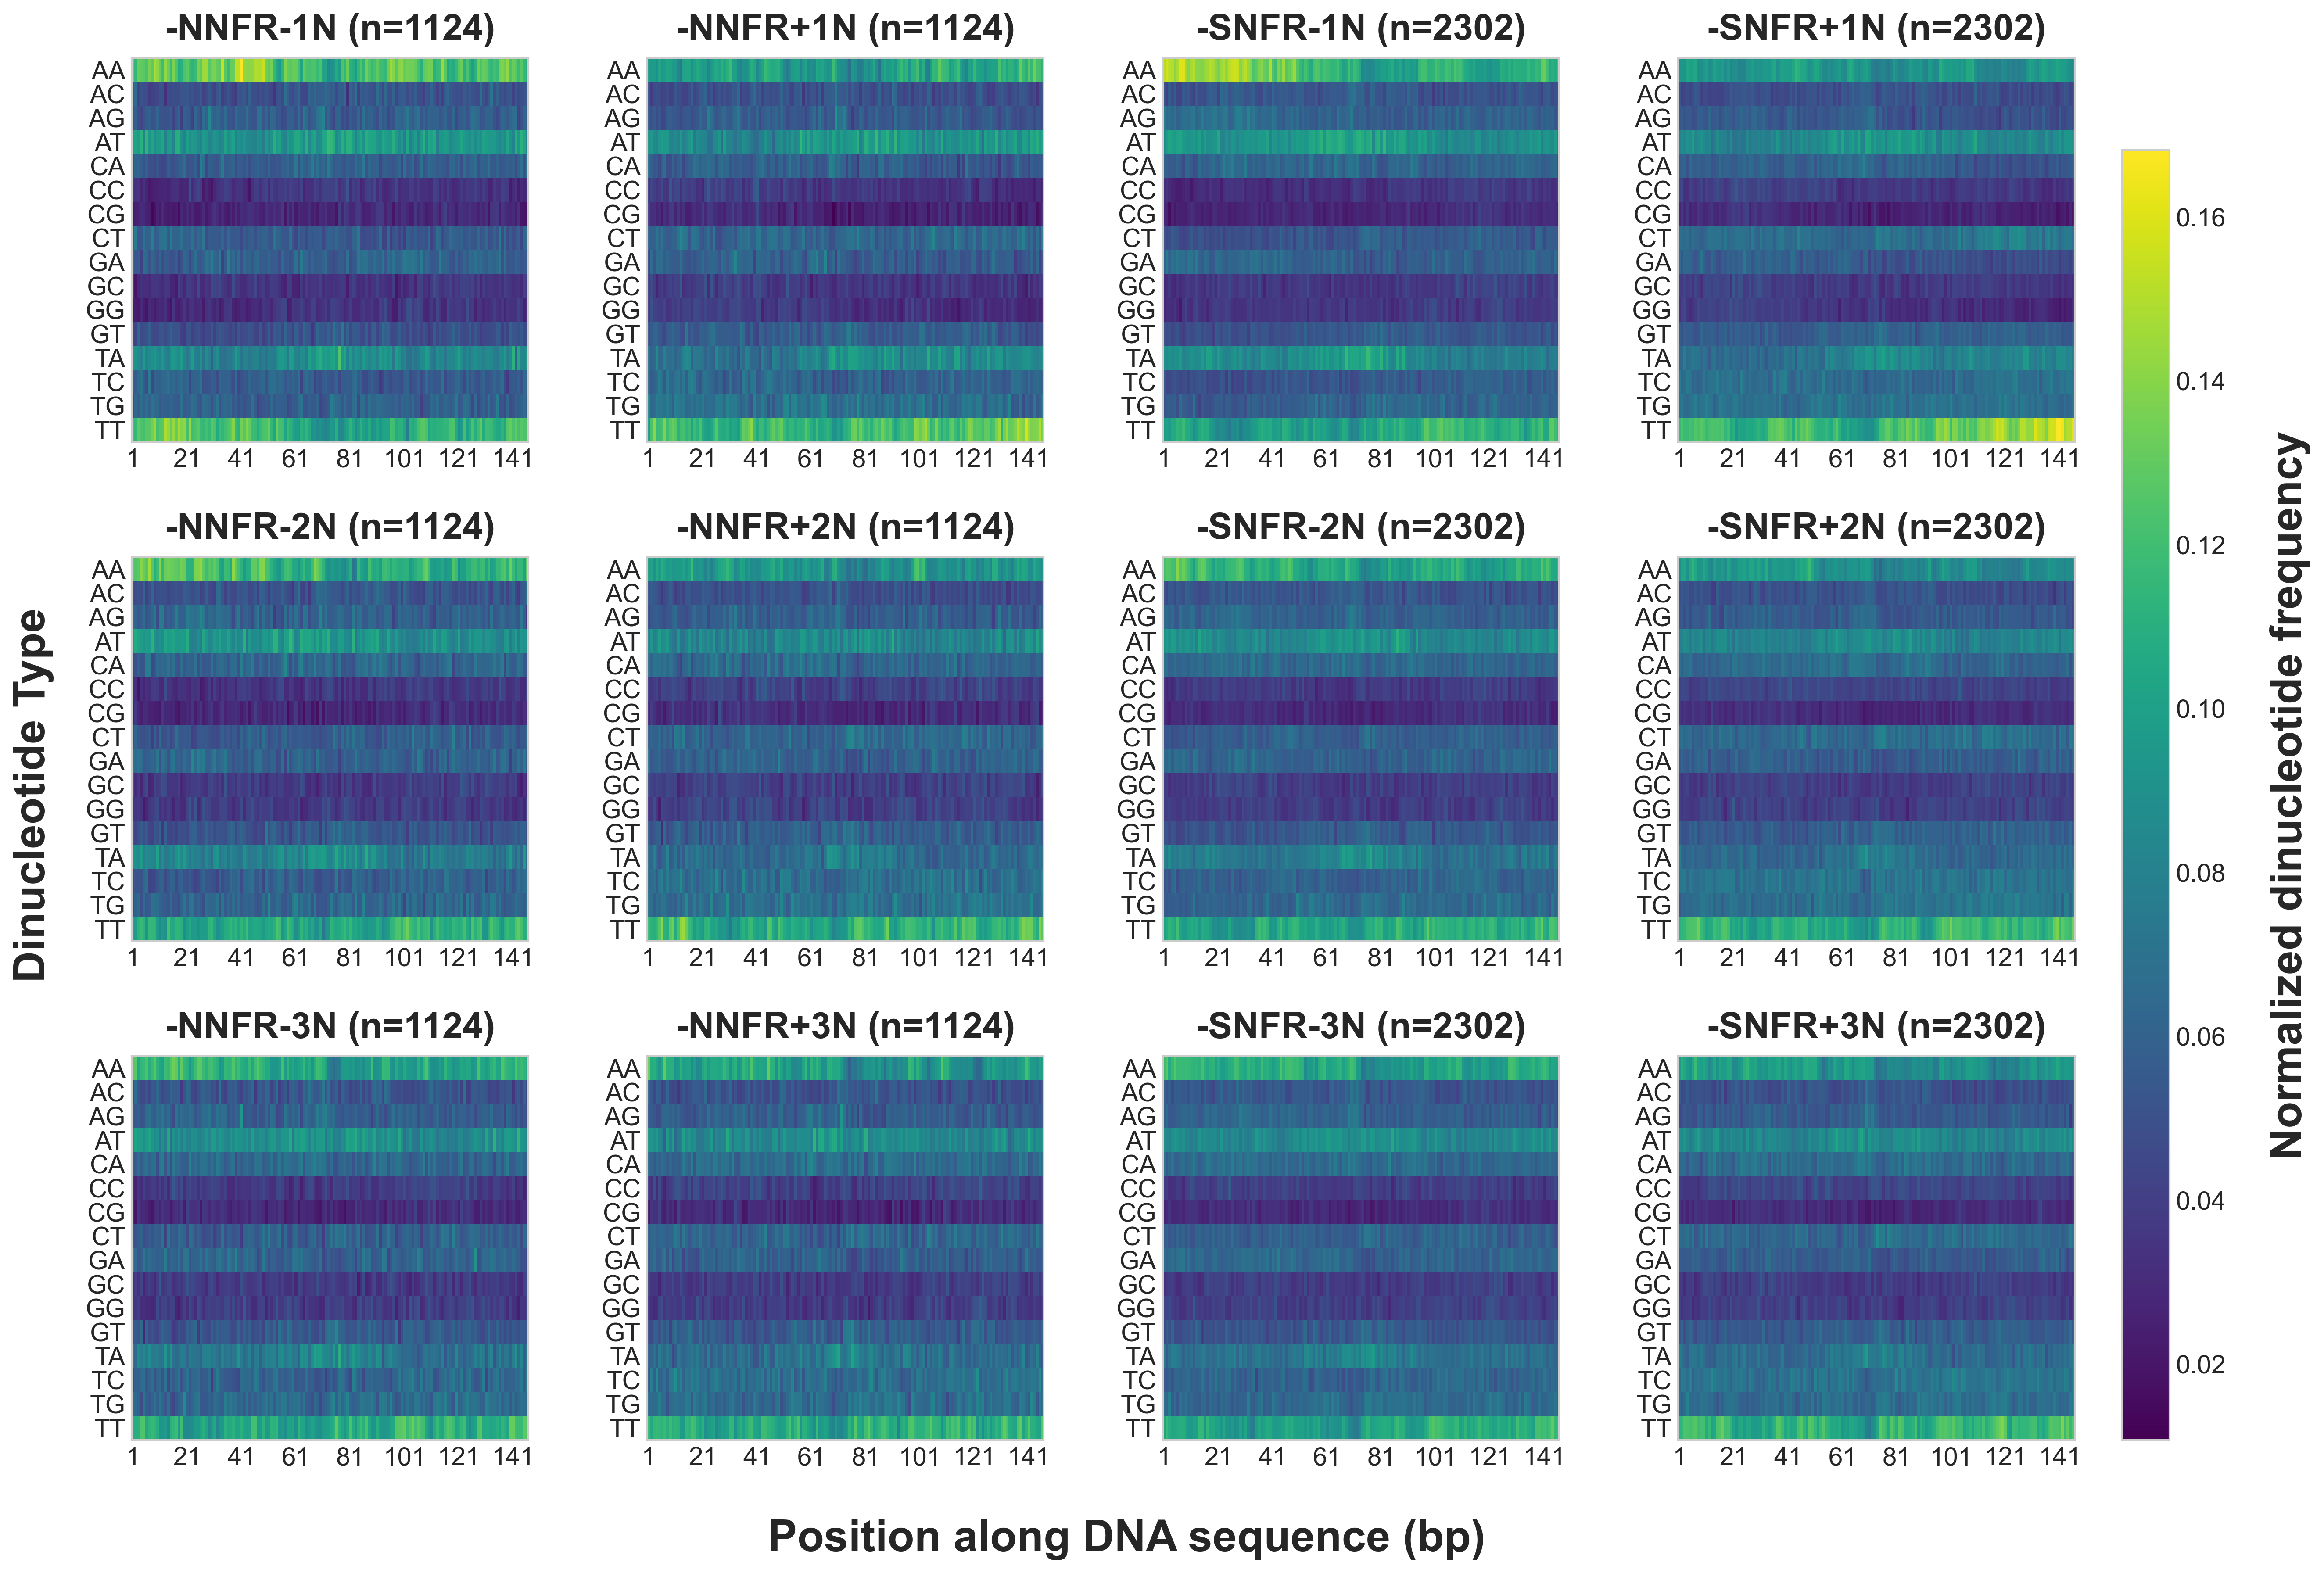

In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import seaborn as sns

# 设置期刊论文绘图参数，增加字体大小
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': 'Arial',
    'font.size': 20,  # 增加基础字体大小
    'axes.titlesize': 20,  # 增加标题字体大小
    'axes.labelsize': 20,  # 增加坐标轴标签字体大小
    'xtick.labelsize': 14,  # 增加 x 轴刻度标签字体大小
    'ytick.labelsize': 14,  # 增加 y 轴刻度标签字体大小
    'legend.fontsize': 20,  # 增加图例字体大小
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.format': 'pdf',
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.1})

# 数据加载与处理
def load_h5_data(file_path):
    with h5py.File(file_path, 'r') as f:
        matrices = f['Nuar'][:]
    return matrices

# 更新文件路径列表，包含所有12个文件
file_paths = [
    "TSS-TTS矩阵/数字矩阵_-NNFR-1N-ALL.h5",
    "TSS-TTS矩阵/数字矩阵_-NNFR+1N-ALL.h5",
    "TSS-TTS矩阵/数字矩阵_-SNFR-1N-ALL.h5",
    "TSS-TTS矩阵/数字矩阵_-SNFR+1N-ALL.h5",
    "TSS-TTS矩阵/数字矩阵_-NNFR-2N-ALL.h5",
    "TSS-TTS矩阵/数字矩阵_-NNFR+2N-ALL.h5",
    "TSS-TTS矩阵/数字矩阵_-SNFR-2N-ALL.h5",
    "TSS-TTS矩阵/数字矩阵_-SNFR+2N-ALL.h5",
    "TSS-TTS矩阵/数字矩阵_-NNFR-3N-ALL.h5",
    "TSS-TTS矩阵/数字矩阵_-NNFR+3N-ALL.h5",
    "TSS-TTS矩阵/数字矩阵_-SNFR-3N-ALL.h5",
    "TSS-TTS矩阵/数字矩阵_-SNFR+3N-ALL.h5"
]

# 加载所有文件的数据
matrices_list = [load_h5_data(file_path) for file_path in file_paths]

# 计算每个文件的平均矩阵
average_matrices = [np.mean(matrices, axis=0) for matrices in matrices_list]

# 可视化与保存
dinucleotides = ['AA', 'AC', 'AG', 'AT', 'CA', 'CC', 'CG', 'CT',
                 'GA', 'GC', 'GG', 'GT', 'TA', 'TC', 'TG', 'TT']
positions = np.arange(1, 147)

# 创建3x4子图布局
fig, axs = plt.subplots(3, 4, figsize=(18, 14), gridspec_kw={'wspace': 0.3, 'hspace': 0.3})  # 减小了行间距和列间距

vmin = min([mat.min() for mat in average_matrices])
vmax = max([mat.max() for mat in average_matrices])

# 更新标题列表，包括所有12个文件的标题
titles = [
    '-NNFR-1N', '-NNFR+1N', '-SNFR-1N', '-SNFR+1N',
    '-NNFR-2N', '-NNFR+2N', '-SNFR-2N', '-SNFR+2N',
    '-NNFR-3N', '-NNFR+3N', '-SNFR-3N', '-SNFR+3N'
]

# 绘制热图
for i, ax in enumerate(axs.flat):
    im = ax.imshow(average_matrices[i], cmap='viridis', aspect='auto', vmin=vmin, vmax=vmax)
    
    # 设置横轴刻度为每20个位置出现一个
    ax.set_xticks(np.arange(0, 146, 20))
    ax.set_xticklabels(positions[::20])  # 从positions中每隔20个取一个值作为刻度标签
    
    ax.set_yticks(range(16))
    ax.set_yticklabels(dinucleotides)
    ax.set_title(f"{titles[i]} (n={matrices_list[i].shape[0]})", fontweight='bold', pad=10)
    ax.grid(False)

# 添加共享颜色条
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Normalized dinucleotide frequency', fontsize=24, fontweight='bold', labelpad=24)

# 设置共享坐标轴标签，横坐标位置调整为中间位置
fig.text(0.5, 0.09, "Position along DNA sequence (bp)", fontweight='bold', ha='center', fontsize=24)
fig.text(0.03, 0.5, "Dinucleotide Type", fontweight='bold', va='center', rotation='vertical', fontsize=24)

# 调整子图位置，避免与颜色条重叠
plt.subplots_adjust(left=0.08, right=0.9, bottom=0.15, top=0.9)

# 保存图像
plt.savefig("可视化图/Negative chain_heatmap.pdf", format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()